## IMMIGRATION TRENDS IN THE UNITED STATES

Ece Tanriverdi 

Link to my Github Webpage: NEW WEBPAGE HERE


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Project Goals


The team, **Ece Tanriverdi**, will be investigating data sets related to immigration trends in the United States. The project will focus on examining various demographic variables such as country of origin, rates of voluntary versus forced immigration, and settlement patterns across U.S. states. At this stage, I am considering a few data sets that provide comprehensive insights into immigration to the U.S. over the past decade(2013-2023). These data sets will be crucial in understanding the shifts in immigration patterns, especially in light of major global events like COVID-19.

The data I am using from Homeland Security Statistics (OHSS)  is found here: https://ohss.dhs.gov/#:~:text=OHSS%20%7C%20Office%20of%20Homeland%20Security%20Statistics,-Previous&text=Our%20interactive%20map%20shows%20state,grants%2C%20and%20arrivals%20and%20adjustments.

The data I am using from U.S. Department of State is found here: https://travel.state.gov/content/travel/en/legal/visa-law0/visa-statistics/nonimmigrant-visa-statistics.html


**update this paragraph**
The data will be sourced from Office of Homeland Security Statistics (OHSS) and U.S. Depatment of State, which offer detailed statistics on immigrant demographics and geographic trends. With this data, I aim to explore several key questions, including:

- Which countries send the most immigrants to the U.S.?  
- Are there any trends in demographic information of immigrants?
- Are there noticeable trends in immigration patterns, particularly post-COVID-19?

Initial Steps
My initial approach will be to extract, transform, and load (ETL) the data from OHSS and USCB to ensure it is clean and tidy for analysis. For now, I will focus on identifying three to five key statistics that reveal interesting trends in immigration, such as:

- The top five countries of origin for U.S. immigrants in the last decade.
- The most common states for immigrant settlement are ranked by population size.
- Any significant changes in the rates of immigration post-COVID-19.

A preliminary graph will be generated to visualize the distribution of immigrants by country of origin, which will provide insight into global migration patterns.

## Collaboration Plan

Since I am working on this project independently, I will maintain a consistent schedule to meet the project goals. I plan to set up weekly work sessions and will upload all relevant code and data analysis to a private GitHub repository. I will also use Jupyter Notebooks to document the ETL process and track progress. Any challenges or difficulties in formatting and tidying the data will be documented for review.

**IMMIGRANTS THEN AND NOW**

The graph shows the trends in total, affirmative, and defensive asylee cases from 2013 to 2023.
-  Overall Trends: The total number of cases fluctuates, with notable increases in 2018-2019 and a sharp rise in 2023.
- COVID-19 Impact: A decline in cases occurred in 2020-2021, likely due to travel restrictions and immigration policy changes during the pandemic.
- Affirmative vs. Defensive Cases: Defensive cases increased steadily, reflecting stricter immigration enforcement and more asylum claims during deportation proceedings.

These trends highlight how global events and U.S. immigration policies shape asylum applications, providing insights for policymakers and organizations working with immigrants.


explain what u did here 


In [92]:
refugee = pd.read_csv("/Users/athleticsimage/Desktop/CMPS3160_FinalProject/CMPS3160_FinalProject/MPI-Data-Hub_Imm_N-Percent-US-Pop_2023.csv")
refugee = refugee.drop(range(0, 19))
refugee.head(10)

,Year,Number of Immigrants,Immigrants as a Percentage of the U.S. Population
19,2013,"41,348,100",13.10%
20,2014,"42,391,800",13.30%
21,2015,"43,290,400",13.50%
22,2016,"43,739,300",13.50%
23,2017,"44,525,900",13.70%
24,2018,"44,728,700",13.70%
25,2019,"44,932,900",13.70%
26,2021,"45,270,100",13.60%
27,2022,"46,182,200",13.90%
28,2023,"47,831,400",14.30%


talk about your summary statistic

In [94]:
year_max_immigrants = refugee.loc[refugee['Number of Immigrants'].idxmax()]

year_max_immigrants


Year                                                       2023
Number of Immigrants                                 47,831,400
Immigrants as a Percentage of the U.S. Population        14.30%
Name: 28, dtype: object

talk about ypur tbale

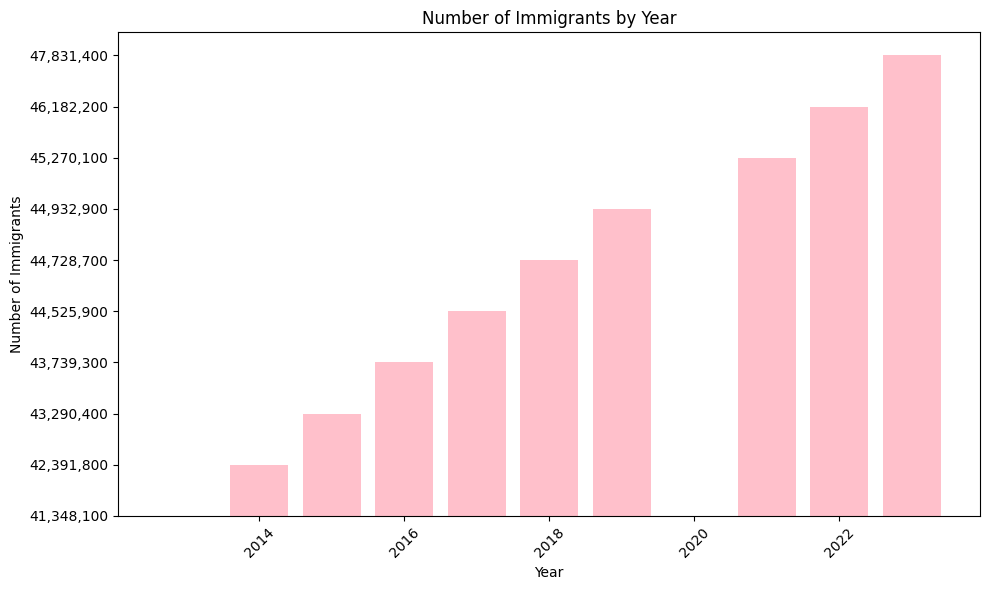

In [96]:
plt.figure(figsize=(10, 6))
plt.bar(refugee['Year'], refugee['Number of Immigrants'], color='pink')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Number of Immigrants by Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

'explain your plot

In [ ]:
refugee['US Population (Number)'] = refugee['Immigrants as a Percentage of the U.S. Population'] * 1_000_000

plt.figure(figsize=(10, 6))
plt.plot(refugee['Year'], refugee['Number of Immigrants'], label='Number of Immigrants', color='pink', marker='o')
plt.plot(refugee['Year'], refugee['US Population (Number)'], label='U.S. Population', color='green', marker='x')

plt.xlabel('Year')
plt.ylabel('Population (Number)')
plt.title('Comparison of Immigrants and U.S. Population by Year')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

from here its the new data set


**non immigrants starting here**

In [28]:
noni2013 = pd.read_csv("/Users/athleticsimage/Desktop/CMPS3160_FinalProject/CMPS3160_FinalProject/noni2013.csv")
noni2013.drop(["Waived / Overcome"], axis=1, inplace= True)

noni2013.columns=["Visa Category", "Issued", "Refused", "Total Applications"]
noni2013

,Visa Category,Issued,Refused,Total Applications
0,A1,"10,574","2,501","13,075"
1,A2,"95,994","20,956","116,950"
2,A3,"1,135",780,"1,915"
3,B1,"41,956","14,113","56,069"
4,B1/B2,"5,645,580","1,484,912","7,130,492"
...,...,...,...,...
77,U2,116,85,201
78,U3,"1,391",460,"1,851"
79,U4,42,35,77
80,U5,55,16,71


In [29]:
noni2013["Issued"] = noni2013["Issued"].replace(",", "", regex=True)
noni2013["Refused"] = noni2013["Refused"].replace(",", "", regex=True)


In [30]:
total_issued = (noni2013.at[81,'Issued'])
total_refused = (noni2013.at[81,'Refused'])
y=np.array([total_issued, total_refused])
y


array(['9164349', '2289664'], dtype='<U7')

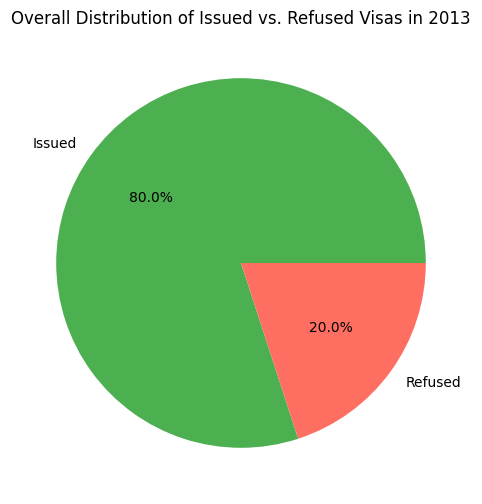

In [31]:
plt.figure(figsize=(8, 6))
plt.pie(y,
    labels=["Issued", "Refused"],
    autopct="%1.1f%%",
    colors=["#4CAF50", "#FF6F61"]
)
plt.title("Overall Distribution of Issued vs. Refused Visas in 2013")
plt.show()


In [32]:
noni2023 = pd.read_csv("/Users/athleticsimage/Desktop/CMPS3160_FinalProject/CMPS3160_FinalProject/noni23.csv")

noni2023.columns=["Visa Category", "Issued", "Refused", "Total Application"]
noni2023


,Visa Category,Issued,Refused,Total Application
0,A1,"9,448",444,"9,892"
1,A2,"98,550","4,087","102,637"
2,A3,680,90,770
3,B1,"29,286","5,693","34,979"
4,B1/B2,"5,902,426","1,842,683","7,745,109"
...,...,...,...,...
72,U2,216,37,253
73,U3,"1,306",167,"1,473"
74,U4,18,8,26
75,U5,24,1,25


In [33]:
noni2023.dtypes


Visa Category        object
Issued               object
Refused              object
Total Application    object
dtype: object

had to remove the commas

In [34]:
noni2023["Issued"] = noni2023["Issued"].replace(",", "", regex=True) 
noni2023["Refused"] = noni2023["Refused"].replace(",", "", regex=True)


In [35]:
total_issued = (noni2023.at[76,'Issued'])
total_refused = (noni2023.at[76,'Refused'])
y=np.array([total_issued, total_refused])
y


array(['10438327', '2481121'], dtype='<U8')

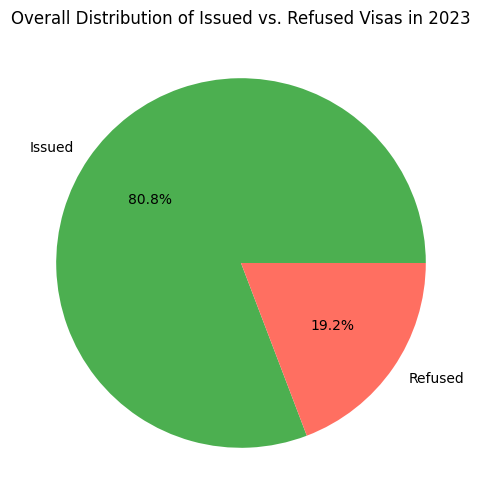

In [36]:
plt.figure(figsize=(8, 6))
plt.pie( y,
    labels=["Issued", "Refused"],
    autopct="%1.1f%%",
    colors=["#4CAF50", "#FF6F61"])
    
plt.title("Overall Distribution of Issued vs. Refused Visas in 2023")
plt.show()

**BEAUTIFULSOUP USED HERE**

In [63]:
import requests

r = requests.get('https://www.migrationpolicy.org/data/state-profiles/state/demographics/US#top', timeout=10)
print(r.status_code)


403


In [64]:
from bs4 import BeautifulSoup
url = 'https://www.migrationpolicy.org/data/state-profiles/state/demographics/US#top'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
r = requests.get(url, headers=headers)
print(r.status_code)
soup = BeautifulSoup( r.content,'html.parser' )
str(soup.get_text()[:500])


200


'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nState Demographics Data | migrationpolicy.org\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSkip to main content\n\n\n\n\n\n \n\n\n\n\n\n\n\n \n\n\n\n\nNewsroom\nMPI en Español\nMultimedia\nDonate\nContact\nSign Up\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nAll MPIResearch PublicationsArticlesMultimediaEventsNews\n\n\n\n\n\n \n\n\n\n            Refine by Date          \n\n\n\nDate \n\n E.g., 11/13/2024\n\n\n\n \n\n\n\n\n\nDate \n\n E.g., 11/13/2024\n\n\n\n \n\n\n \n\n\n \n\n\n\n\n\n\n\n\nMenu\n\n\n\n\n\n\n\n\n\n\n\nResearch & Initiatives\n\nTopics\nRegions\nData\nPrograms\n\n\nPublications\n\nAll Publications\nReports'

In [66]:
soup.find("table")
str(soup.find("table"))[:600]

'<table class="views-table cols-28">\n<thead>\n<tr class="lower-header first-indicator" id="row-demo">\n<th class="subheading">\n          Demographics\n        </th>\n<th class="nohide">\n<div class="tooltip tooltip-header">\n<div class="contents"><p class="tooltip-left">Note: The term "foreign born" refers to people residing in the United States at the\n                     time of the population survey who were not U.S. citizens at birth. The foreign-born population\n                     includes naturalized U.S. citizens, lawful permanent immigrants (or green-card holders),\n                     refug'

In [67]:
df_t1 = pd.read_html(str(soup.find("table")))[0]
display(df_t1[0:10])

/var/folders/6l/7bh9vnpd3bqgbg7ctd65hpg40000gn/T/ipykernel_25785/96289388.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_t1 = pd.read_html(str(soup.find("table")))[0]


,Demographics,"Note: The term ""foreign born"" refers to people residing in the United States at the time of the population survey who were not U.S. citizens at birth. The foreign-born population includes naturalized U.S. citizens, lawful permanent immigrants (or green-card holders), refugees and asylees, certain legal nonimmigrants (including those on student, work, or some other temporary visas), and persons residing in the country without authorization. Foreign Born"
0,Number,46182177
1,% Foreign Born,13.9%
2,Population Change over Time,NaN
3,% change: 2000-2022,48.5%
4,% change: 1990-2000,57.4%
5,Race (%),NaN
6,One race,78.7%
7,White,20.3%
8,Black or African American,9.3%
9,American Indian and Alaska Native,1.1%


In [72]:
print(df_t1.columns)


Index(['Demographics', 'Note: The term "foreign born" refers to people residing in the United States at the  time of the population survey who were not U.S. citizens at birth. The foreign-born population  includes naturalized U.S. citizens, lawful permanent immigrants (or green-card holders),  refugees and asylees, certain legal nonimmigrants (including those on student, work, or some  other temporary visas), and persons residing in the country without authorization.  Foreign Born'], dtype='object')


In [73]:
df_t1.columns=['Demographics','Foreign Born'

]
df_t1

,Demographics,Foreign Born
0,Number,46182177
1,% Foreign Born,13.9%
2,Population Change over Time,NaN
3,% change: 2000-2022,48.5%
4,% change: 1990-2000,57.4%
5,Race (%),NaN
6,One race,78.7%
7,White,20.3%
8,Black or African American,9.3%
9,American Indian and Alaska Native,1.1%


wtf i can do with the data i have right now?
1. How has the number of asylum seekers changed over the decade from 2013 to 2023?
2. What changes have there been in the number of visas granted and refused in different visa categories?
3. How have the socio-demographic profiles of immigrants changed over the years? (For example, age, education level, employment status, etc.)

join:
- join by year 


